In [1]:
!pip install deepfake-ecg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 12.7 MB/s eta 0:00:00


In [2]:
import deepfakeecg

In [3]:
!pip install ecg_plot

In [4]:
import os
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import ecg_plot

In [5]:
os.mkdir("electrocardiograms")

In [8]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 65 bytes


In [9]:
!kaggle datasets download -d vlbthambawita/deepfake-ecg

100% 15.4G/15.4G [02:50<00:00, 69.3MB/s]
100% 15.4G/15.4G [02:50<00:00, 97.1MB/s]


In [10]:
from zipfile import ZipFile
file_name = "/content/deepfake-ecg.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')


Done


In [11]:
deepfakeecg.generate(50, "/content/Deepfake-ecg",start_id=0, run_device="cpu",) # Generate 5 ECGs to the current folder starting from id=0

100%|██████████| 50/50 [00:03<00:00, 14.62it/s]


In [23]:
j = 0
for i in os.listdir("/content/Deepfake-ecg/pulse2pulse_150k"):
    j = j + 1
    ecg = np.zeros([5000,12])
    ecg_temp = np.loadtxt("/content/Deepfake-ecg/pulse2pulse_150k"+i)
    ecg[:,0:2] = ecg_temp[:,0:2]
    ecg[:,2]= ecg[:,1]- ecg[:,0]
    ecg[:,3] = -0.5 * (ecg[:,0] + ecg[:,1])
    ecg[:,4] = ecg[:,0]-0.5 * ecg[:,1]
    ecg[:,5] = ecg[:,1]-0.5 * ecg[:,0]
    ecg[:,6:] = ecg_temp[:,2:]
    plt.figure(figsize=(20,8))
    ecg_plot.plot_12(ecg.T*(2/1000), title="Deep Fake ECG {}".format(j))
    plt.show()

FileNotFoundError: /content/Deepfake-ecg/pulse2pulse_150kfrom_006_chkp_2500_150k not found.

<Figure size 2000x800 with 0 Axes>

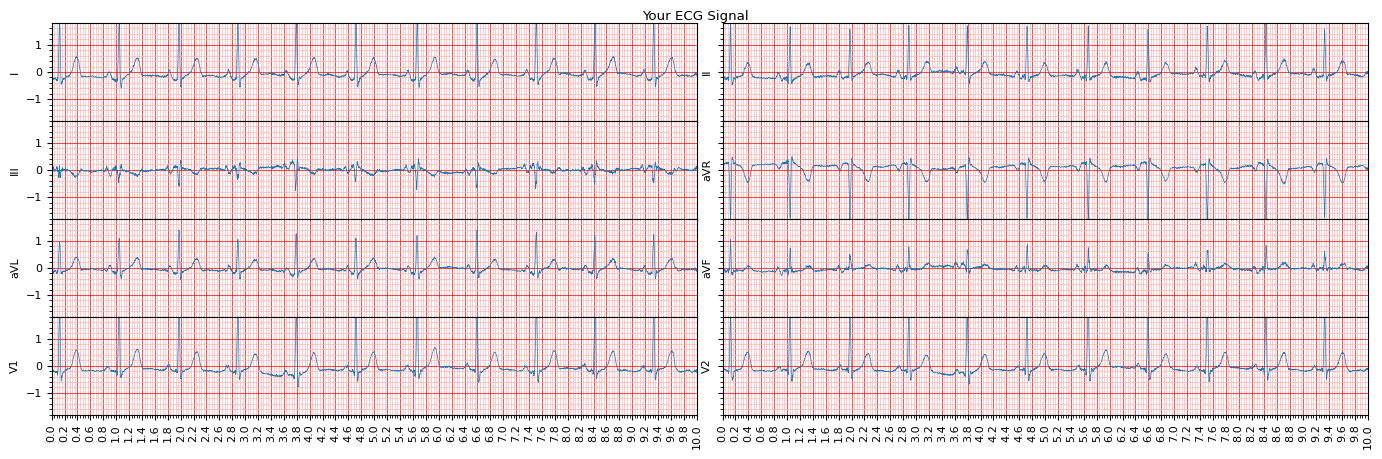

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import ecg_plot  # Assuming you have imported the required library for ECG plotting

# Specify the file path of the ECG signal you want to plot
ecg_file_path = "/content/Deepfake-ecg/0.asc"

# Load the ECG data from the specified file
ecg = np.loadtxt(ecg_file_path)

# Perform any necessary calculations or preprocessing if needed
# For example:
ecg[:, 2] = ecg[:, 1] - ecg[:, 0]
ecg[:, 3] = -0.5 * (ecg[:, 0] + ecg[:, 1])
ecg[:, 4] = ecg[:, 0] - 0.5 * ecg[:, 1]
ecg[:, 5] = ecg[:, 1] - 0.5 * ecg[:, 0]

# Plot the ECG signal
plt.figure(figsize=(20, 8))
ecg_plot.plot_12(ecg.T * (2 / 1000), title="Your ECG Signal")
plt.show()
